<a href="https://colab.research.google.com/github/duytan118/AI/blob/main/fuzzy___%C4%91i%E1%BB%81u_khi%E1%BB%83n_nhi%E1%BB%87t_%C4%91%E1%BB%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=224b34ae2bb8960945eb080d9b1862152b44d757f722875a823ff45141525568
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

In [3]:

universe = np.linspace(18,30,100) 
universe1 = np.linspace(-5,60,100)
universe2 = np.linspace(0,255,100)
setpoint = ctrl.Antecedent(universe, 'setpoint')
sensor = ctrl.Antecedent(universe1, 'sensor')
pwm = ctrl.Consequent(universe2, 'pwm')

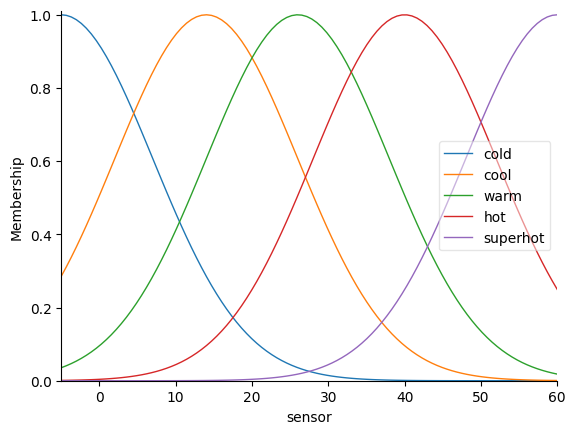

In [4]:
sensor['cold'] = fuzzy.gaussmf(sensor.universe,-5,12)
sensor['cool'] = fuzzy.gaussmf(sensor.universe,14,12)
sensor['warm'] = fuzzy.gaussmf(sensor.universe,26,12)
sensor['hot'] = fuzzy.gaussmf(sensor.universe,40,12)
sensor['superhot'] = fuzzy.gaussmf(sensor.universe,60,12)
sensor.view()

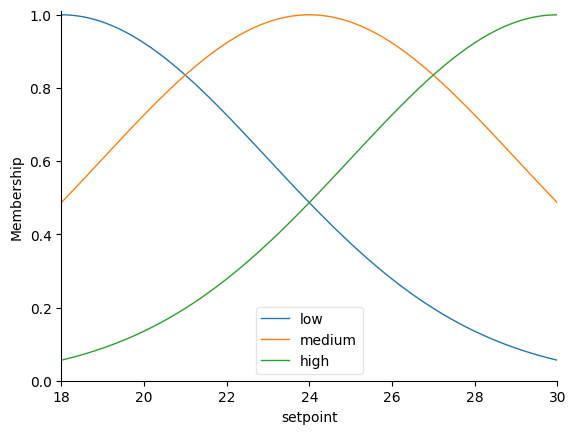

In [5]:

setpoint['low'] = fuzzy.gaussmf(setpoint.universe,18,5)
setpoint['medium'] = fuzzy.gaussmf(setpoint.universe,24,5)
setpoint['high'] = fuzzy.gaussmf(setpoint.universe,30,5)
setpoint.view()

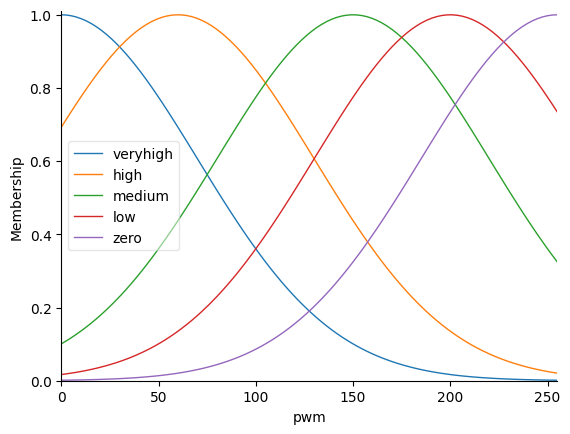

In [6]:

pwm['veryhigh'] = fuzzy.gaussmf(pwm.universe,0,70)
pwm['high'] = fuzzy.gaussmf(pwm.universe,60,70)
pwm['medium'] = fuzzy.gaussmf(pwm.universe,150,70)
pwm['low'] = fuzzy.gaussmf(pwm.universe,200,70)
pwm['zero'] = fuzzy.gaussmf(pwm.universe,255,70)
pwm.view()

In [7]:
rule0 = ctrl.Rule(antecedent=((sensor['cold']&setpoint['low'])|(sensor['cool']&setpoint['low'])|
                              (sensor['cold']&setpoint['medium'])), consequent= pwm['zero'])

rule1 = ctrl.Rule(antecedent=((sensor['cold']&setpoint['high'])|(sensor['cool']&setpoint['medium'])|
                              (sensor['warm']&setpoint['low'])), consequent= pwm['low'])

rule2 = ctrl.Rule(antecedent=((sensor['cool']&setpoint['high'])|(sensor['warm']&setpoint['medium'])|
                              (sensor['hot']&setpoint['low'])), consequent= pwm['medium'])

rule3 = ctrl.Rule(antecedent=((sensor['superhot']&setpoint['medium'])|
                              (sensor['superhot']&setpoint['high'])|
                              (sensor['hot']&setpoint['high'])), consequent= pwm['high'])

rule4 = ctrl.Rule(antecedent=((sensor['warm']&setpoint['high'])|
                              (sensor['hot']&setpoint['medium'])|(sensor['superhot']&setpoint['low'])), consequent= pwm['veryhigh'])

In [8]:
from matplotlib.legend import time
import matplotlib
from skfuzzy.control.controlsystem import ControlSystemSimulation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

System  = ctrl.ControlSystem(rules = [rule1, rule2, rule0, rule3, rule4])
sim = ctrl.ControlSystemSimulation(System, flush_after_run= 61*61+1)
upSampled1 = np.linspace(-5,60,61)
upSampled2 = np.linspace(18,30,61)
x,y = np.meshgrid(upSampled1, upSampled2)
z = np.zeros_like(x)

In [9]:
for i in range(61):
  for j in range(61):
    sim.input['sensor']= x[i,j]
    sim.input['setpoint']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['pwm']

<ipython-input-10-803e01299794>:5: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'z', offset= 60, cmap= 'viridis', anpha= 0.5)
<ipython-input-10-803e01299794>:6: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'x', offset= -5, cmap= 'viridis', anpha= 0.5)
<ipython-input-10-803e01299794>:7: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'y', offset= 18, cmap= 'viridis', anpha= 0.5)


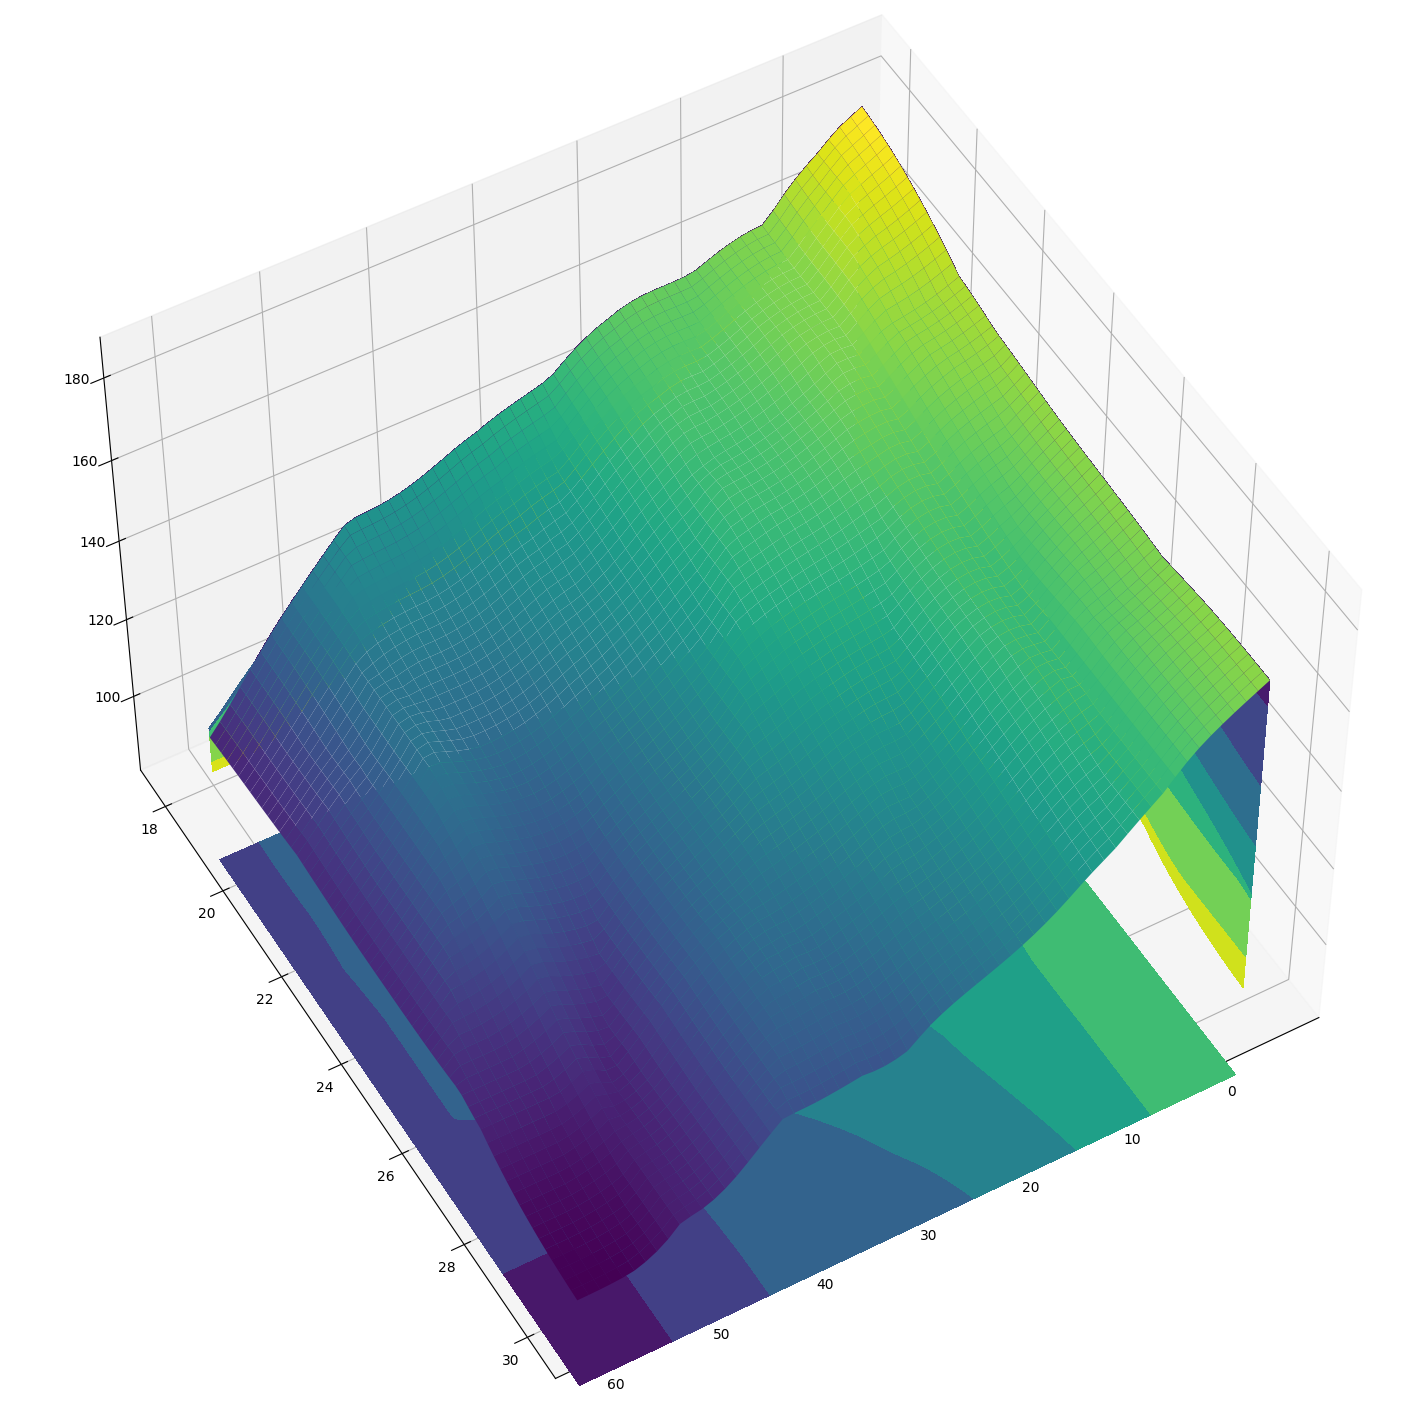

In [10]:
fig = plt.figure(figsize =(18,18))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride= 1, cstride= 1, cmap = 'viridis',
                      linewidth= 0.4, antialiased= True)
cset = ax.contourf(x,y,z, zdir= 'z', offset= 60, cmap= 'viridis', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'x', offset= -5, cmap= 'viridis', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'y', offset= 18, cmap= 'viridis', anpha= 0.5)
ax.view_init(50,60)